In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
shrooms = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [9]:
tree = RandomForestClassifier(random_state=0)

In [11]:
parameters = {'max_depth' : range(1,13,2),
              'n_estimators' : range(10,51,10),
              'min_samples_leaf' : range(1,8),
              'min_samples_split' : range(2,10,2)}

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
gridTree = GridSearchCV(tree,parameters,cv=3, n_jobs=-1)

In [26]:
y = shrooms['class']
X = shrooms.drop('class', axis=1)

In [31]:
gridTree.fit(X,y)

SyntaxError: invalid syntax (<ipython-input-31-3cc061ccd00f>, line 1)

In [28]:
best_tree = gridTree.best_estimator_

In [30]:
gridTree.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

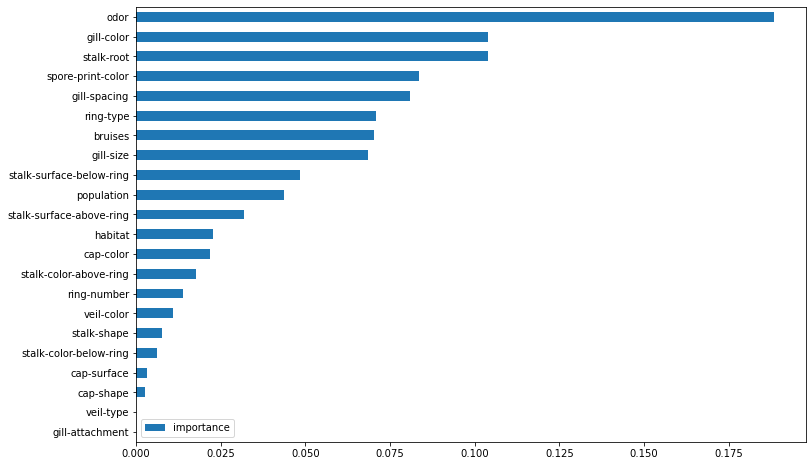

In [34]:
imp = pd.DataFrame(best_tree.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [35]:
train_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [54]:
y_pred = pd.Series(best_tree.predict(train_data))

In [50]:
y_true = pd.read_csv('C:/Users/Роман/Desktop/testing_y_mush.csv')

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

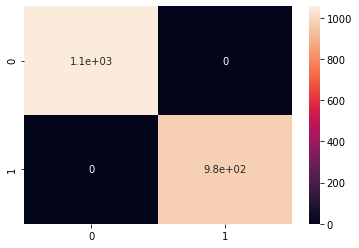

In [61]:
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)